In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df= pd.read_pickle('../../data/Top Fund Positioning/t10_full_universe_weights_20230731.pkl')

df.head()

Security Name Ticker-Region  \
lionshares_id Symbol                                             
SWPPX-US      88579Y101               3M Company        MMM-US   
              831865209  A. O. Smith Corporation        AOS-US   
              002824100      Abbott Laboratories        ABT-US   
              00287Y109             AbbVie, Inc.       ABBV-US   
              B4BNMY3      Accenture Plc Class A        ACN-US   

                                    GICS Sector  \
lionshares_id Symbol                              
SWPPX-US      88579Y101             Industrials   
              831865209             Industrials   
              002824100             Health Care   
              00287Y109             Health Care   
              B4BNMY3    Information Technology   

                                       GICS Industry Name  \
lionshares_id Symbol                                        
SWPPX-US      88579Y101          Industrial Conglomerates   
              831865209                 Building Products   
              002824100  Health Care Equipment & Supplies   
              00287Y109                     Biotechnology   
              B4BNMY3                         IT Services   

                                                   GICS Industry Group  \
lionshares_id Symbol                                                     
SWPPX-US      88579Y101                                  Capital Goods   
              831865209                                  Capital Goods   
              002824100               Health Care Equipment & Services   
              00287Y109  Pharmaceuticals Biotechnology & Life Sciences   
              B4BNMY3                              Software & Services   

                                      GICS Sub Industry Region of Domicile  \
lionshares_id Symbol                                                         
SWPPX-US      88579Y101        Industrial Conglomerates      North America   
              831865209               Building Products      North America   
              002824100           Health Care Equipment      North America   
              00287Y109                   Biotechnology      North America   
              B4BNMY3    It Consulting & Other Services      North America   

                          MSCI Country P_Country     FF_Country  ...  \
lionshares_id Symbol                                             ...   
SWPPX-US      88579Y101  United States        US  UNITED STATES  ...   
              831865209  United States        US  UNITED STATES  ...   
              002824100  United States        US  UNITED STATES  ...   
              00287Y109  United States        US  UNITED STATES  ...   
              B4BNMY3    United States        US        IRELAND  ...   

                         Active Weight     Asset Type  Asset Class      DATE  \
lionshares_id Symbol                                                           
SWPPX-US      88579Y101      -0.000911  Equity Common       Equity  20230731   
              831865209       0.000087  Equity Common       Equity  20230731   
              002824100      -0.002167  Equity Common       Equity  20230731   
              00287Y109      -0.002954  Equity Common       Equity  20230731   
              B4BNMY3        -0.002236  Equity Common       Equity  20230731   

                         Fund Ticker              FFD_NAME Fund Price  \
lionshares_id Symbol                                                    
SWPPX-US      88579Y101        SWPPX  Schwab Capital Trust      70.88   
              831865209        SWPPX  Schwab Capital Trust      70.88   
              002824100        SWPPX  Schwab Capital Trust      70.88   
              00287Y109        SWPPX  Schwab Capital Trust      70.88   
              B4BNMY3          SWPPX  Schwab Capital Trust      70.88   

                                  aum bench_id Fund Brand  
lionshares_id Symbol                                       
SWPPX-US      88579Y10

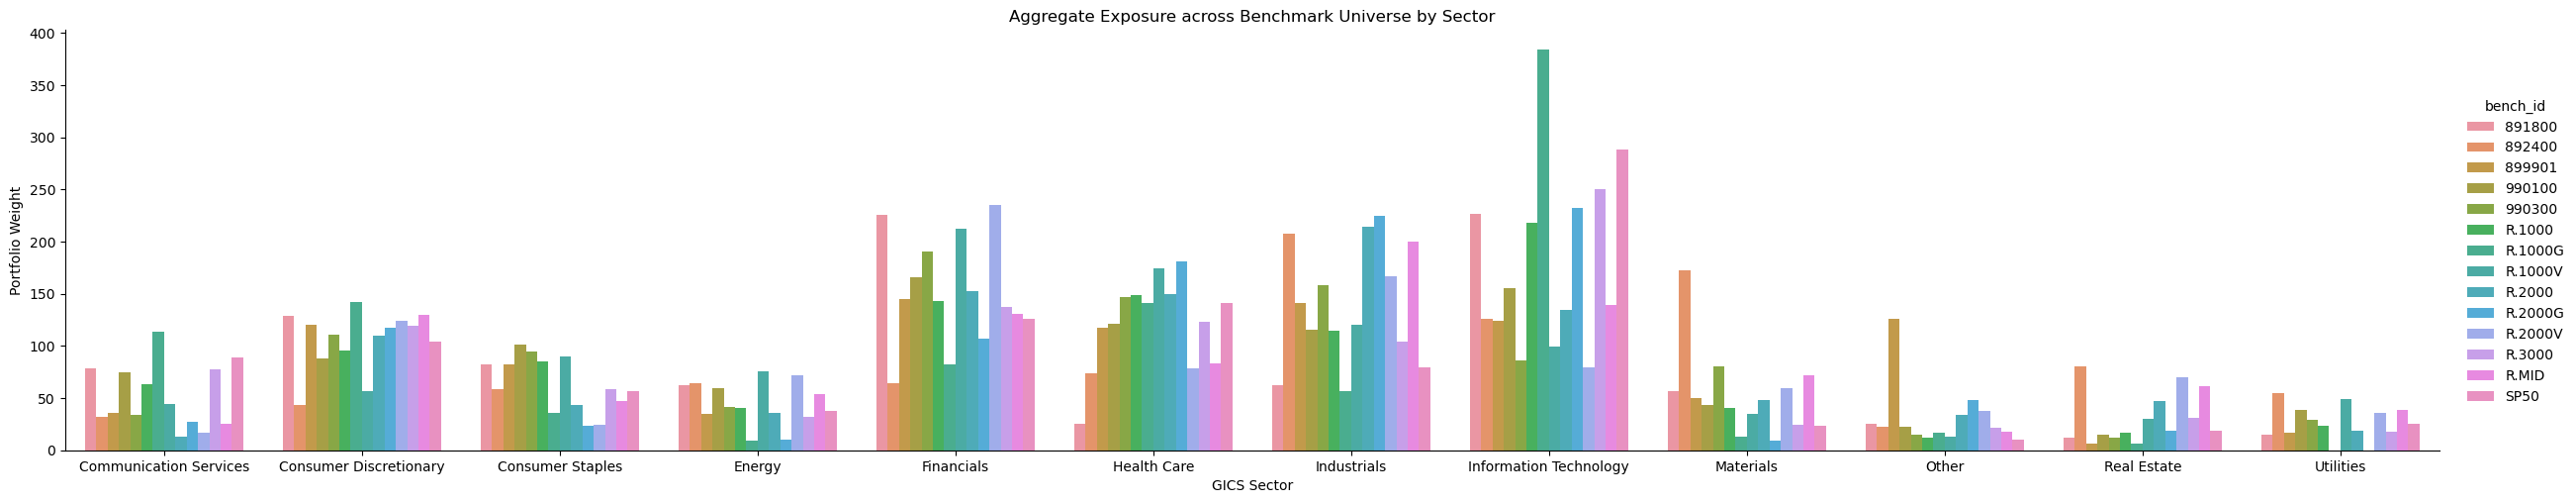

In [6]:
df_plot = df.groupby(['bench_id','GICS Sector']).agg({'Portfolio Weight':'sum'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Portfolio Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Aggregate Exposure across Benchmark Universe by Sector')
plt.show()

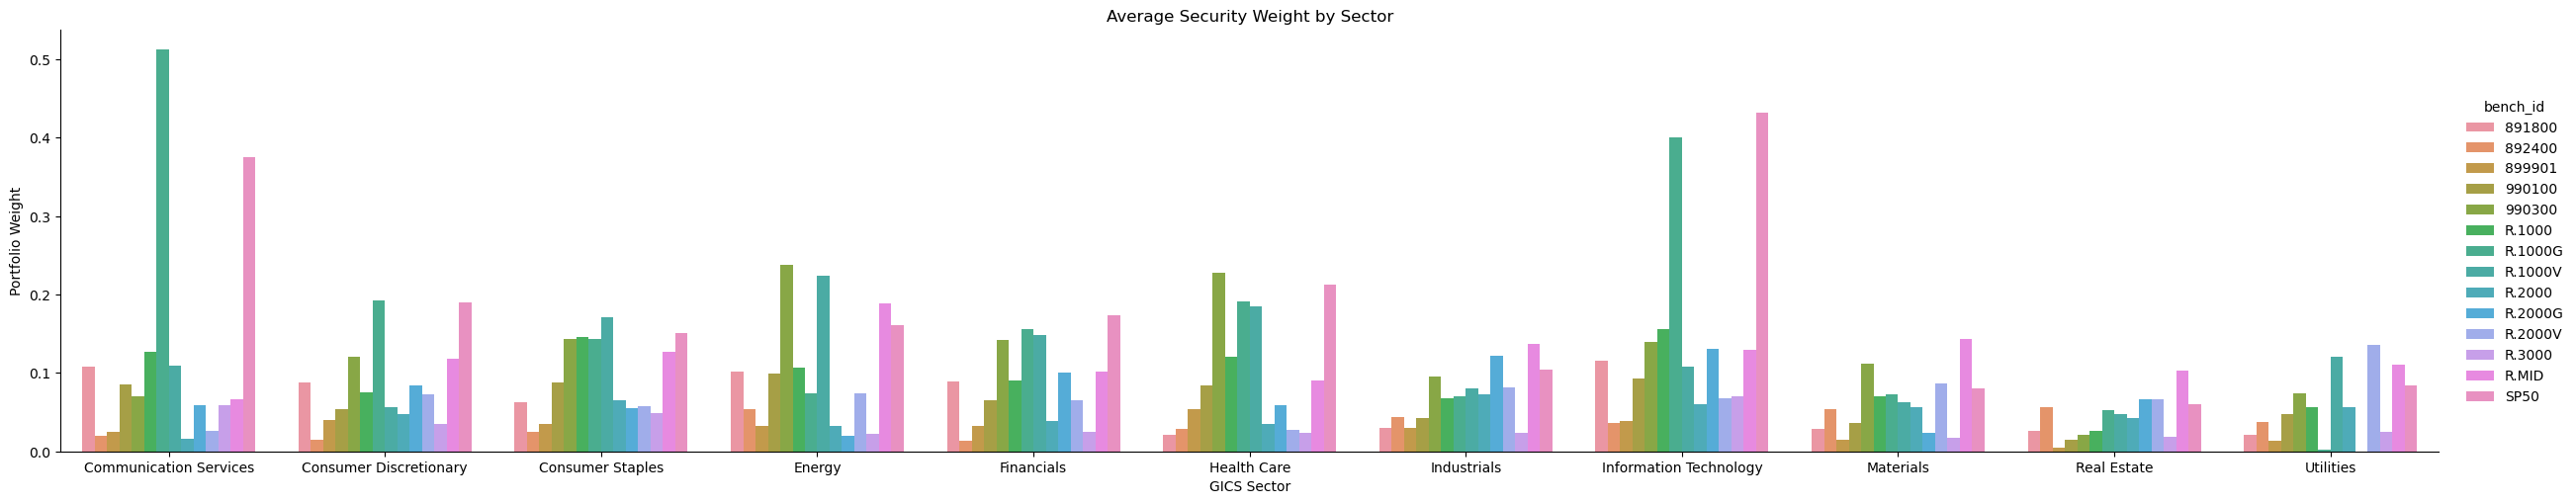

In [9]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Portfolio Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Portfolio Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Average Security Weight by Sector')
plt.show()

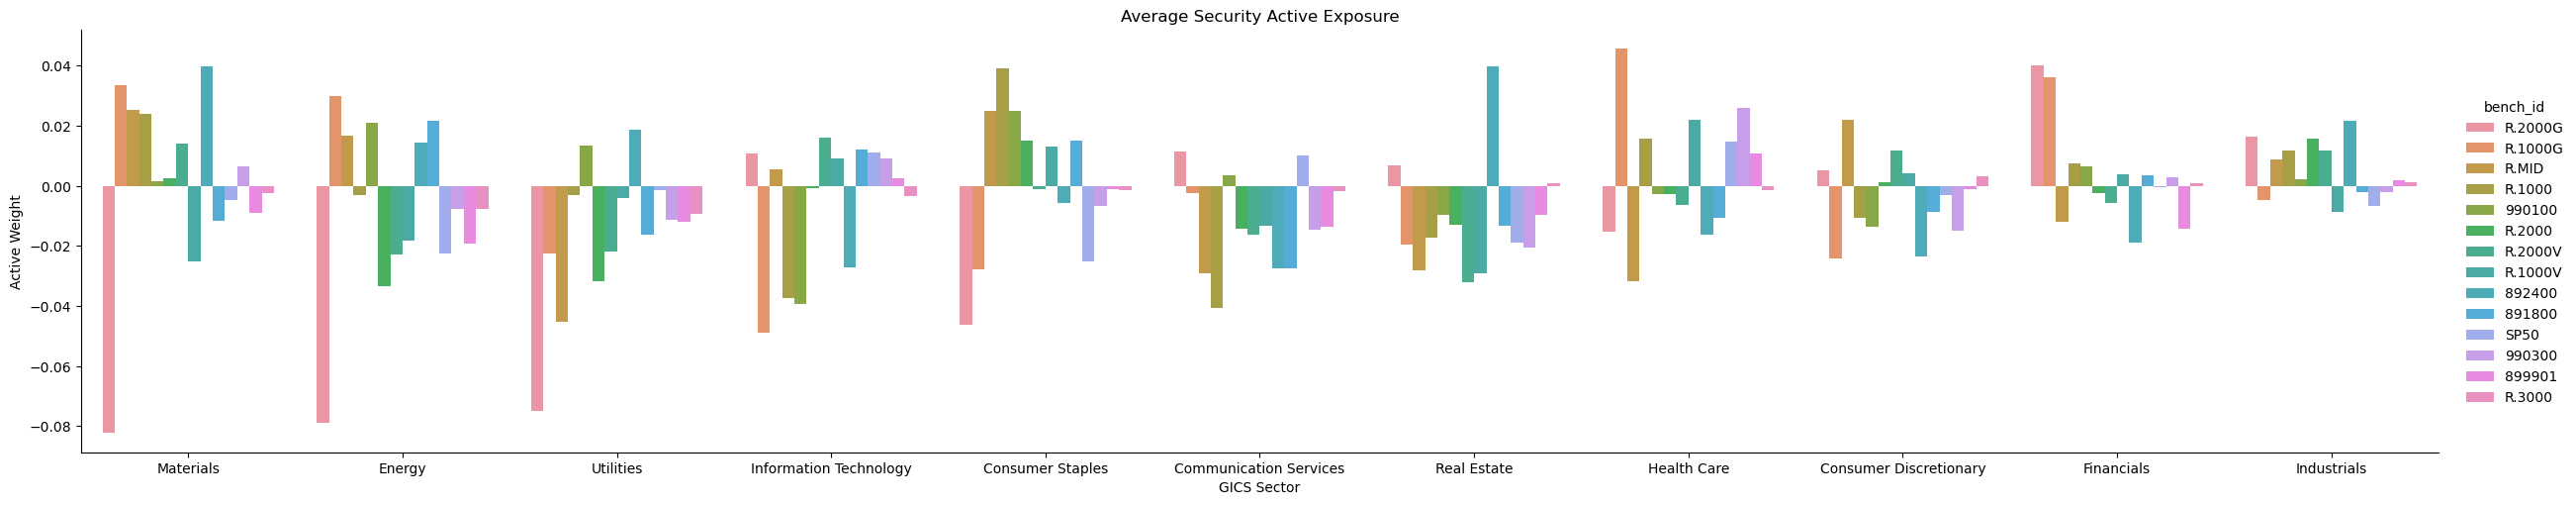

In [13]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).sort_values('Active Weight')
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
        aspect = 5,
            )
plt.title('Average Security Active Exposure')
plt.show()

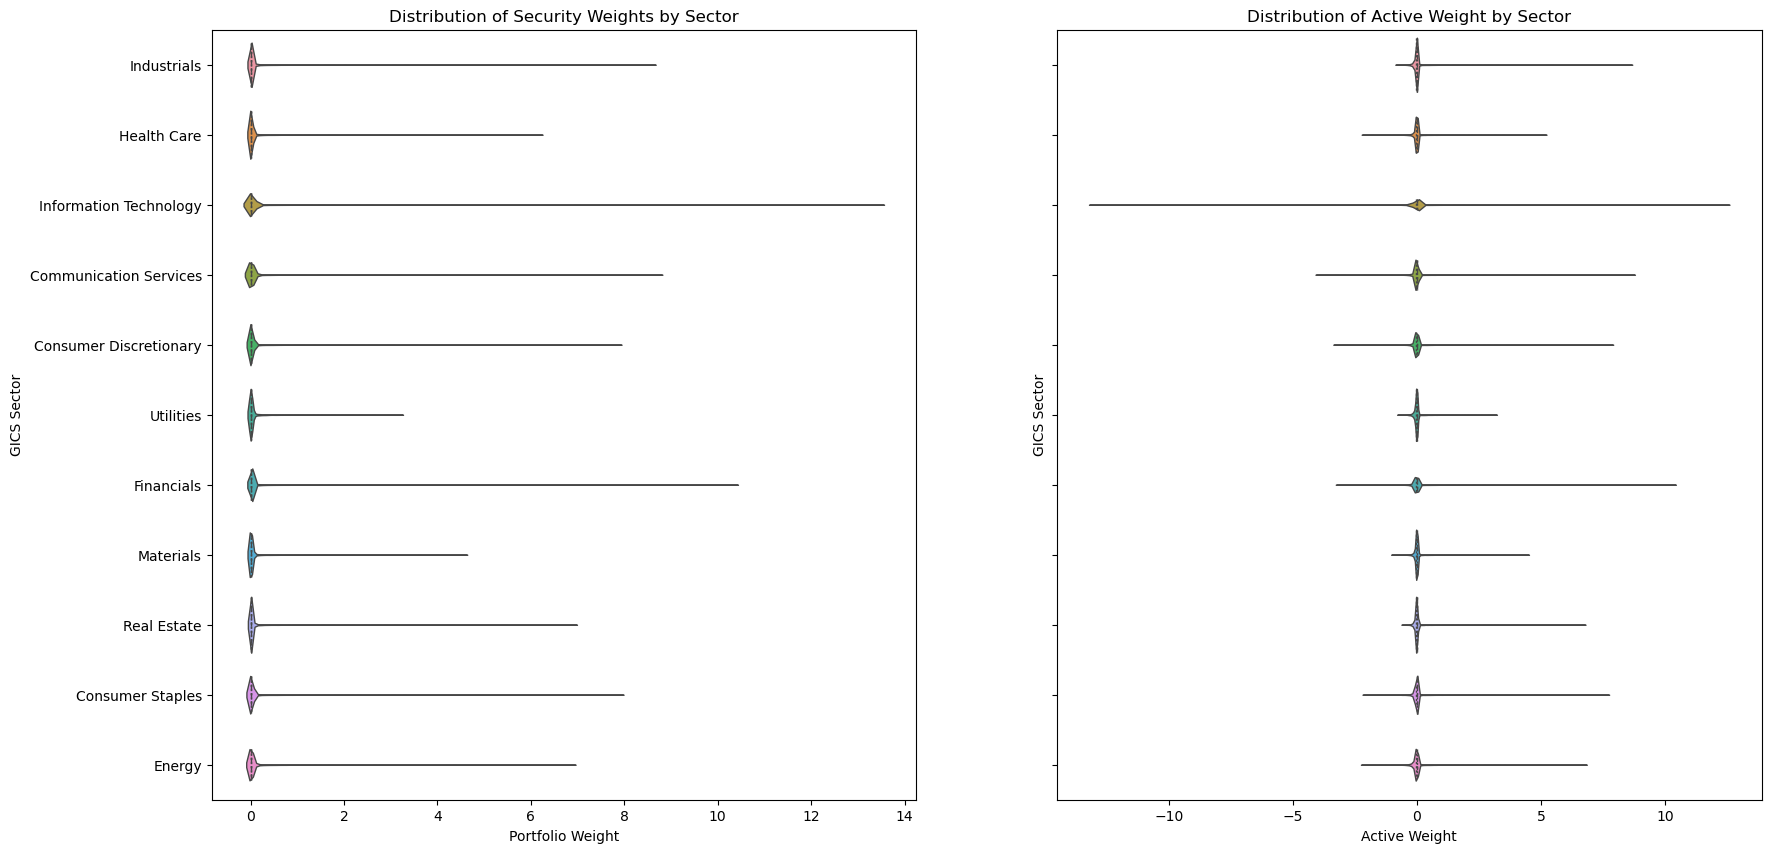

In [16]:
# Draw a nested violinplot and split the violins for easier comparison
fig,axs = plt.subplots(1,2,figsize=(20,10),sharey=True)

sns.violinplot(data=df[df['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Portfolio Weight",
               inner="quart", linewidth=1,orient ='h',ax=axs[0])
axs[0].set_title("Distribution of Security Weights by Sector")

sns.violinplot(data=df[df['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",
            inner="quart", linewidth=1,orient ='h',ax=axs[1])
axs[1].set_title("Distribution of Active Weight by Sector")
plt.show()

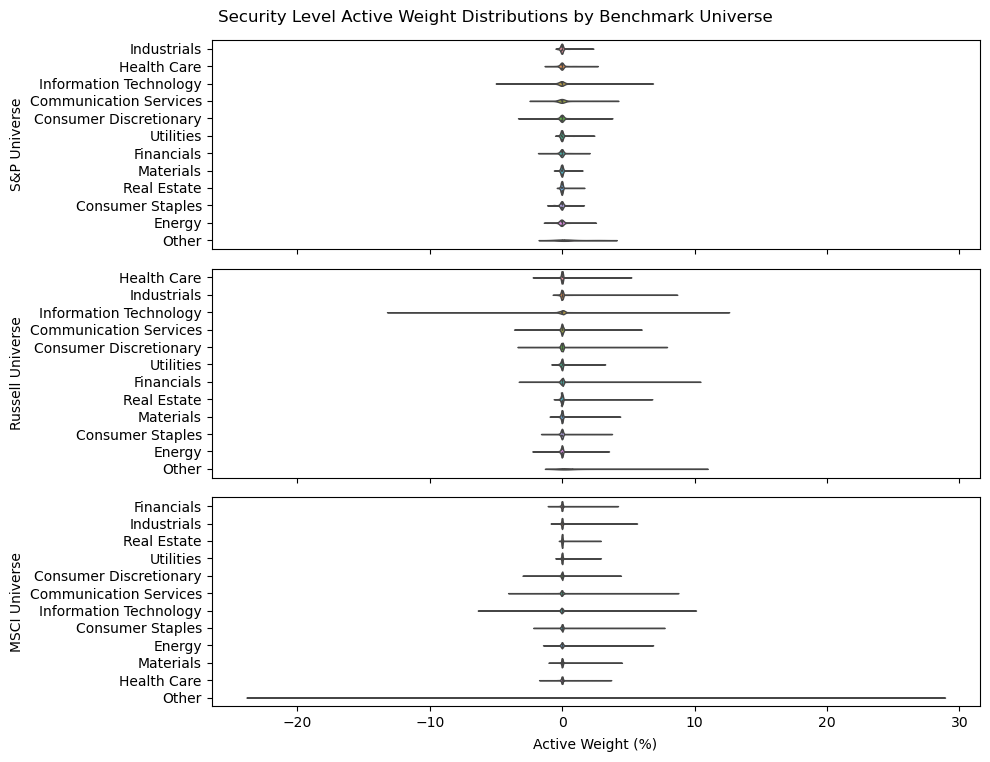

In [92]:
benchs = [('S&P',['SP50']),('Russell',['R.1000','R.1000G','R.1000V','R.2000','R.2000V','R.2000G','R.3000','R.MID']),('MSCI',['990300','892400','990100','899901','891800'])]
fig, axs = plt.subplots(len(benchs), 1,figsize=(10,7.5),sharex=True)  # Create subplots

# Iterate through each unique benchmark
for i, bench in enumerate(benchs): 
    sns.violinplot(data=df[df['bench_id'].isin(bench[1])].reset_index(), y="GICS Sector", x="Active Weight",
                   inner="quart", linewidth=1,orient ='h',ax=axs[i])
    axs[i].set_ylabel(f'{bench[0]} Universe')  # Set title for each subplot
    axs[i].set_xlabel('')

plt.suptitle("Security Level Active Weight Distributions by Benchmark Universe")
fig.text(0.6, -0, 'Active Weight (%)', ha='center', va='center') 
plt.tight_layout()  # Adjust spacing between subplots
plt.show()  # Show the plots

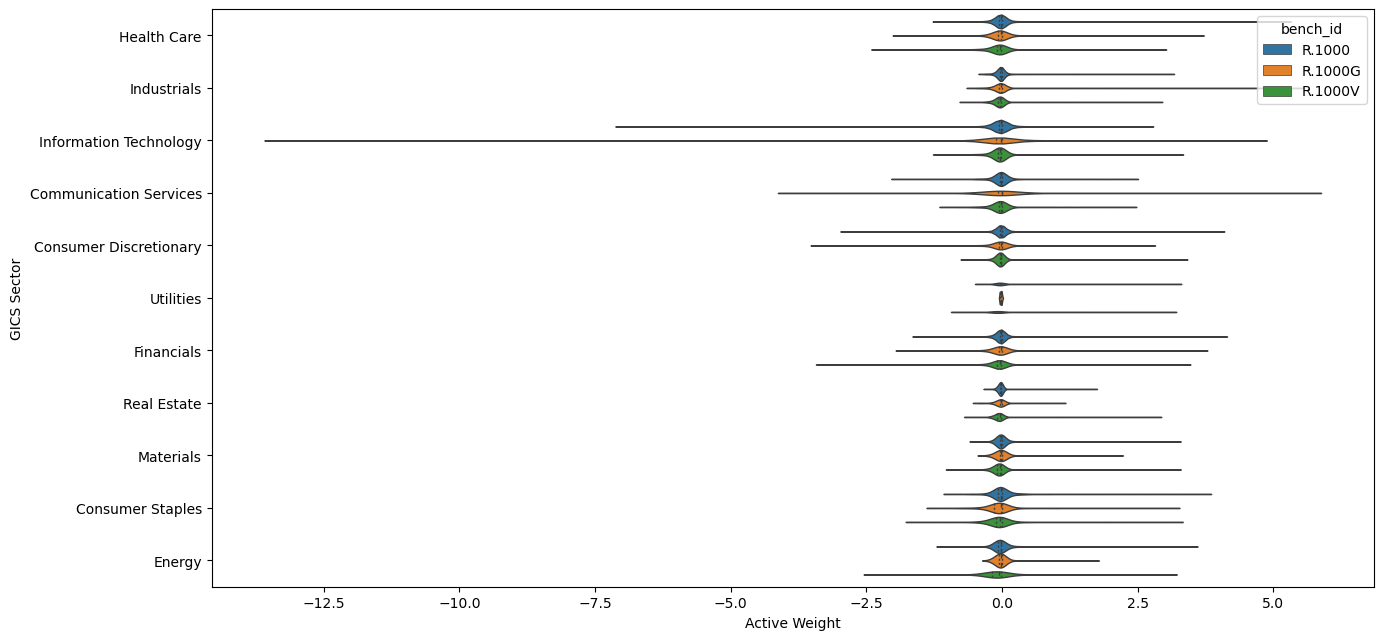

In [50]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.1000','R.1000G','R.1000V']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

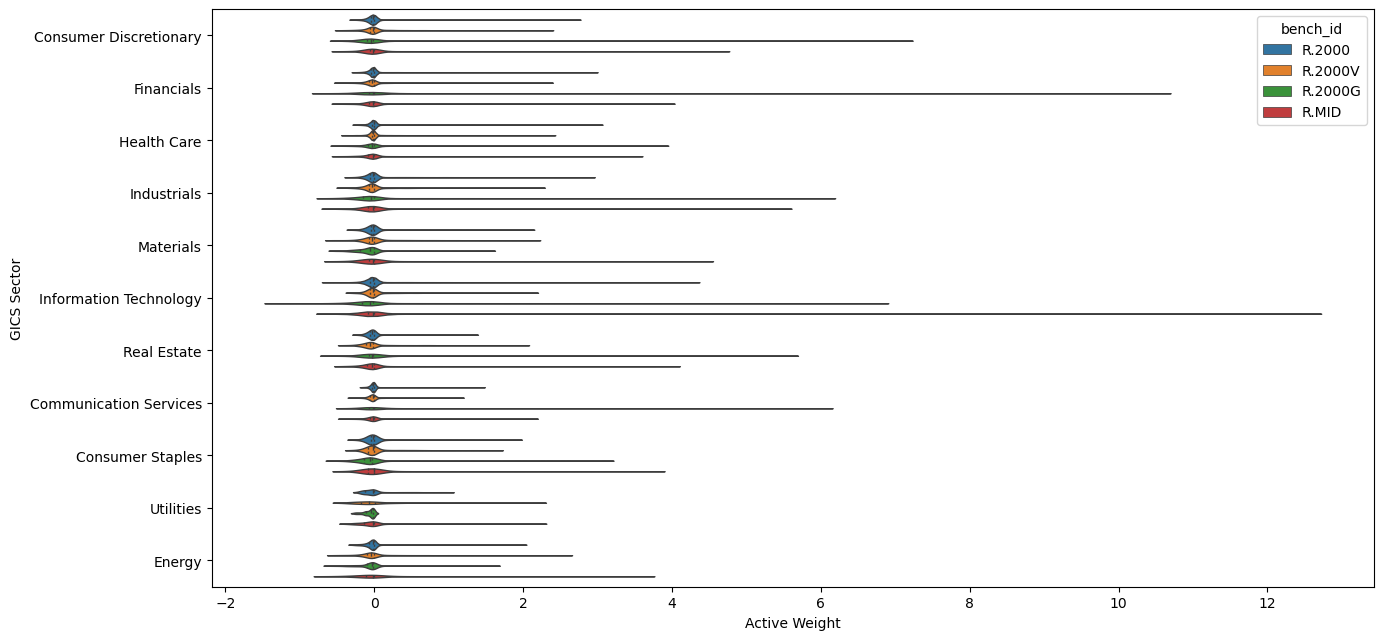

In [52]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

rus_benchs = ['R.2000','R.2000V','R.2000G','R.MID']
df_rus =df[df['bench_id'].isin(rus_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

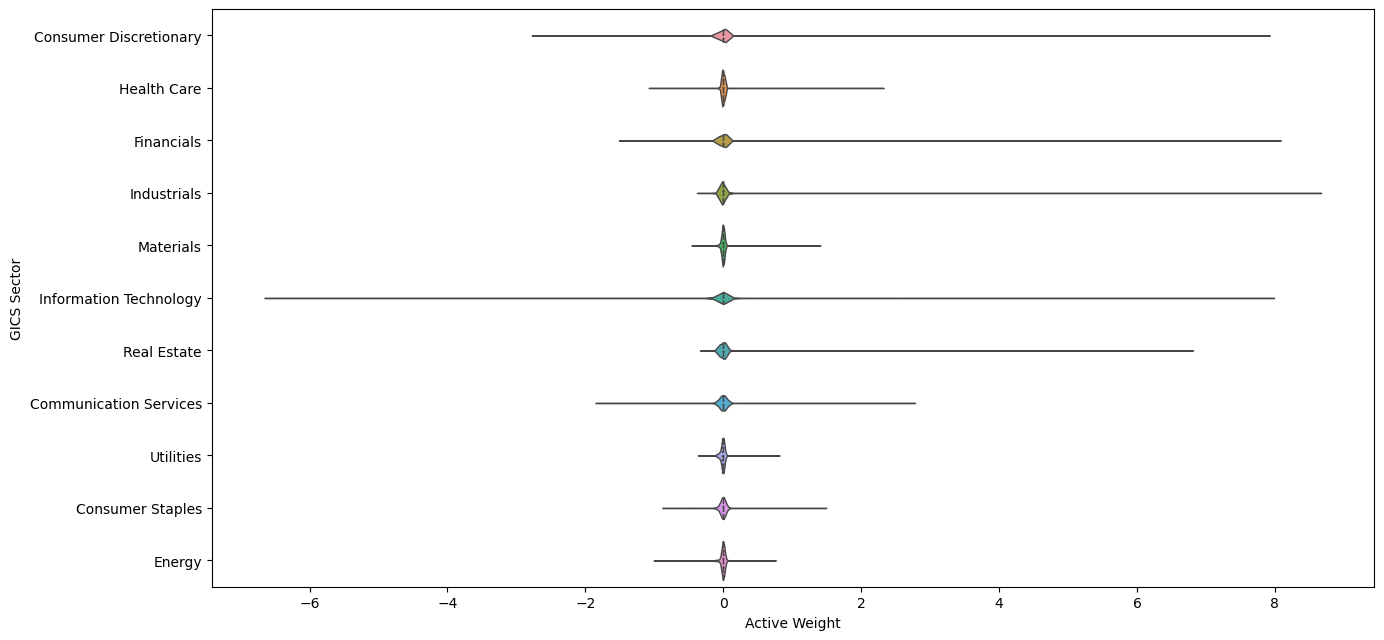

In [53]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

df_rus =df[df['bench_id']=='R.3000']
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",
                   inner="quart", linewidth=1,orient ='h')
plt.show()

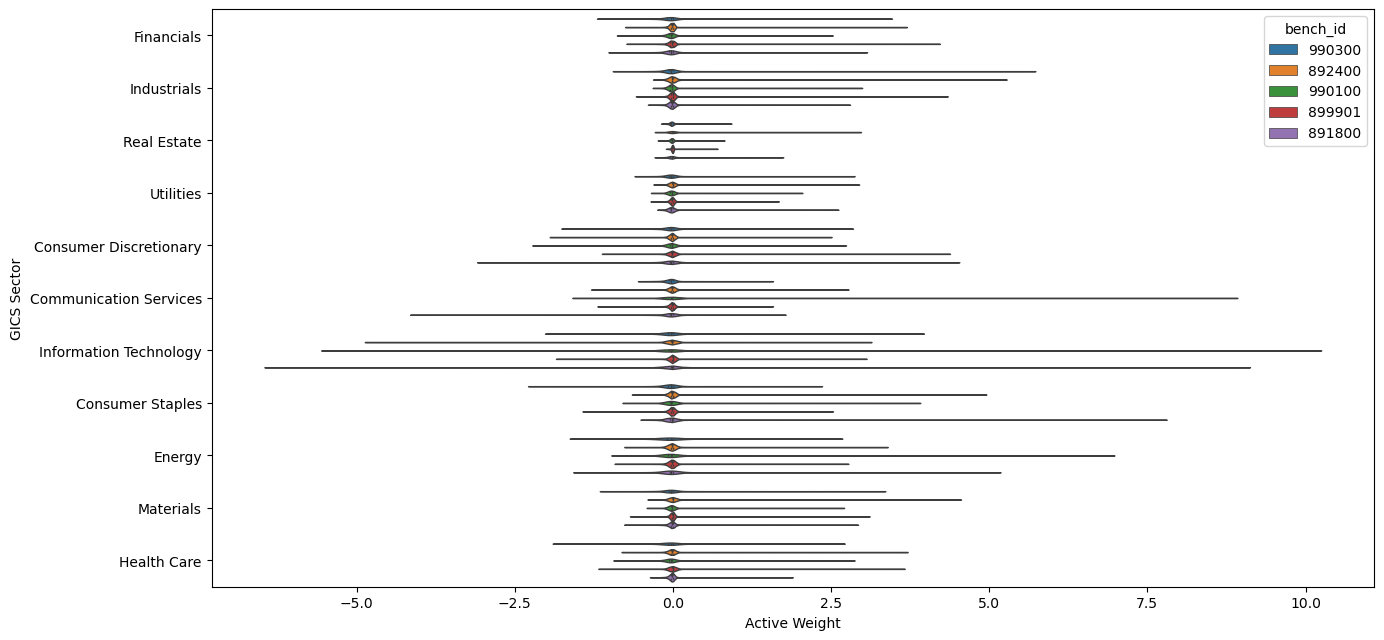

In [55]:
fig, axs = plt.subplots(figsize=(15,7.5)) 

msci_benchs = ['990300','892400','990100','899901','891800']
df_rus =df[df['bench_id'].isin(msci_benchs)]
sns.violinplot(data=df_rus[df_rus['GICS Sector']!='Other'].reset_index(), y="GICS Sector", x="Active Weight",hue = 'bench_id',
                   inner="quart", linewidth=1,orient ='h')
plt.show()

<Axes: xlabel='None-GICS Sector', ylabel='bench_id'>

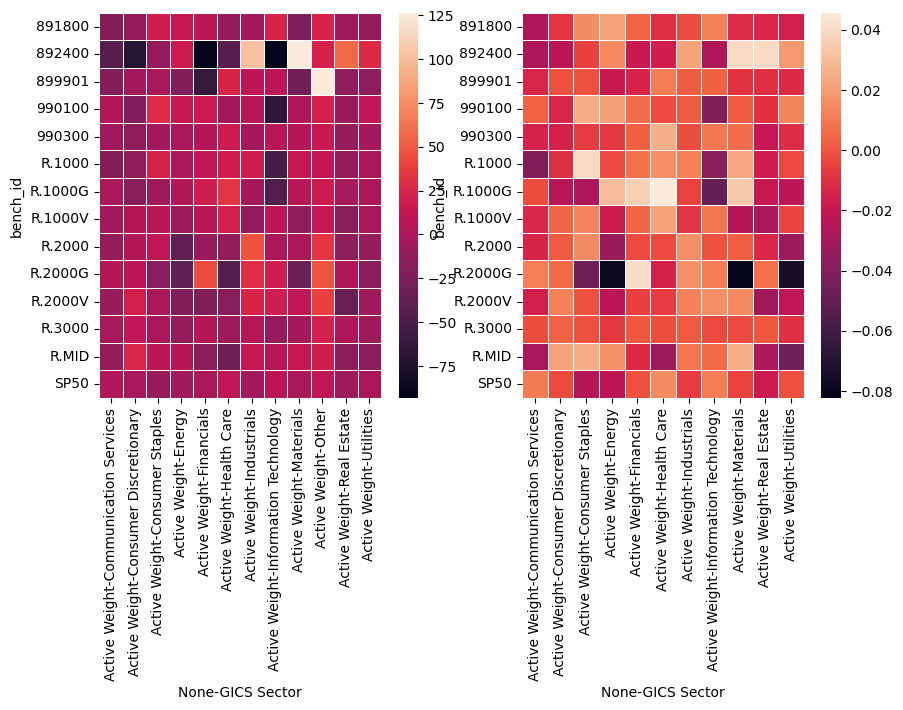

In [67]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
sns.heatmap(df.groupby(['bench_id','GICS Sector']).agg({'Active Weight':'sum'}).unstack(),
            linewidth=.5,ax=axs[0])

sns.heatmap(df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack(),
            linewidth=.5,ax=axs[1])

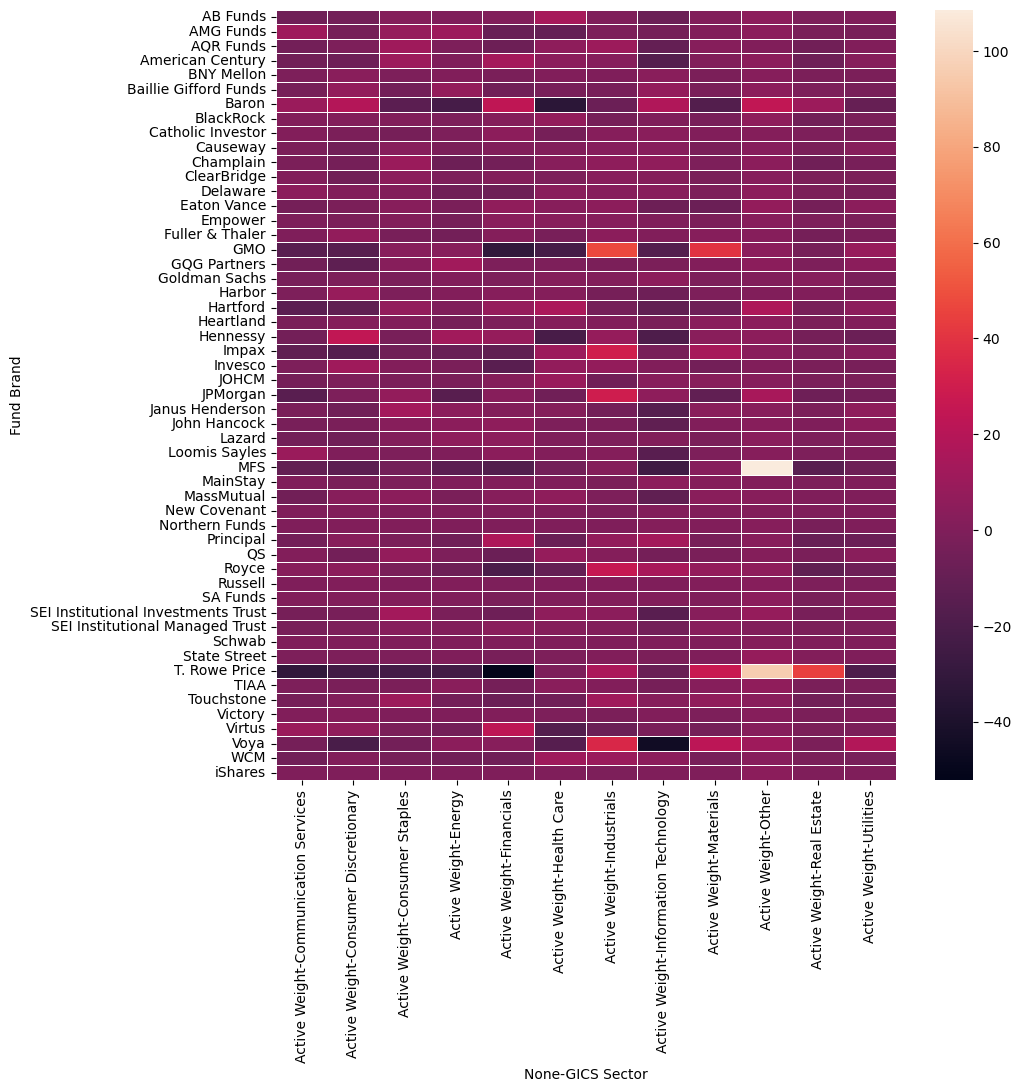

In [76]:
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.groupby(['Fund Brand','GICS Sector']).agg({'Active Weight':'sum'}).unstack(),
            linewidth=.5,ax=ax)

plt.show()

In [ ]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df, annot=True, fmt="d", linewidths=.5, ax=ax)

In [73]:
len(df['Fund Ticker'].unique())

140

In [79]:
df.groupby(['Fund Ticker','GICS Sector']).agg({'Active Weight':'sum'}).sort_values('Active Weight')

,,Active Weight
Fund Ticker,GICS Sector,
PRIKX,Information Technology,-21.673938
TRZRX,Information Technology,-21.673938
MDIZX,Financials,-20.827912
ALVIX,Information Technology,-20.497566
RYPNX,Financials,-19.618882
...,...,...
PRIKX,Real Estate,33.597337
TRZRX,Real Estate,33.597337
BGRIX,Financials,33.836408
